### ICA Topic: 

Comparative Evaluation of Logistic Regression, Random Forest, and Support Vector Machine Models for Predicting Stroke Risk: A Data Preprocessing and Performance Metrics Approach

### Project Aim:

The aim of this study is to compare the predictive performance of SVM, Random Forest, and Logistic Regression models for stroke prediction.

### Author: 

Student Name: Fatai Olamide Azeez

Student Number: B1328150

Course: Machine Learning

#### Importing the required package 

In [172]:
#import the required package
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, make_scorer

#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics


# Libraries to Hyperparameter Tuning
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, loguniform, uniform


# To filter Warnings
import warnings

%matplotlib inline
sns.set()

Import the dataset

In [173]:
dataframe = pd.read_csv("Dataset/stroke_data.csv")

Performing first level EDA before data cleaning

In [174]:
#checking the data head
dataframe.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [175]:
# checking the dimension
dataframe.shape

(5110, 12)

In [176]:
dataframe.describe().round(2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [177]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [178]:
# checking the number of duplicated variable
dataframe.duplicated().sum()

0

In [179]:
# checking the number of null value in each features/column
dataframe.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [180]:
#checking the unique variable in each features
dataframe.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

#### Univariate Analysis

Function to plot a count/histogram of each categorical variables 

In [181]:
def plot_columns(column_names, data=dataframe):
    """
    Function to plot the distribution of categorical variables in the DataFrame.
    
    Parameters:
    data : DataFrame to be analyzed.
    column_names (list): Names of the columns to plot.

    Returns: output/shows a sns count plot for each passed column/variable
    """
    for col in column_names:
        sns.countplot(x=data[col])
        plt.title('Distribution of ' + col)
        plt.show()


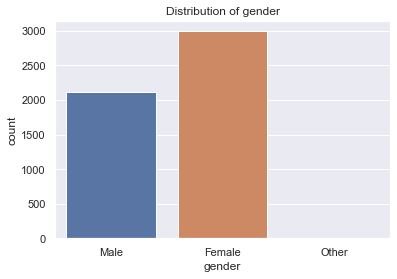

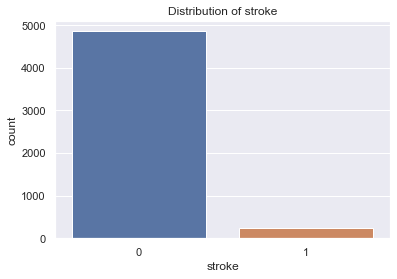

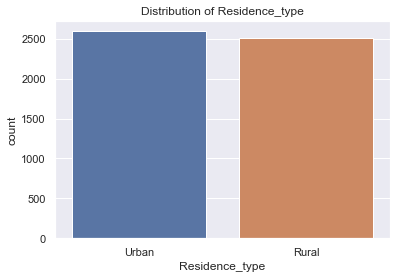

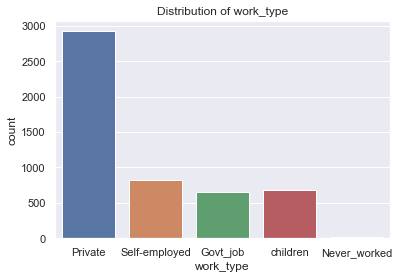

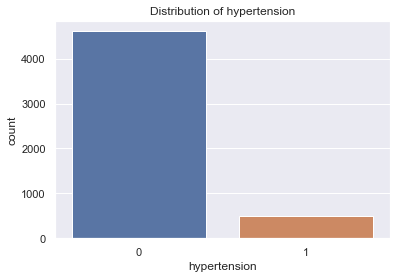

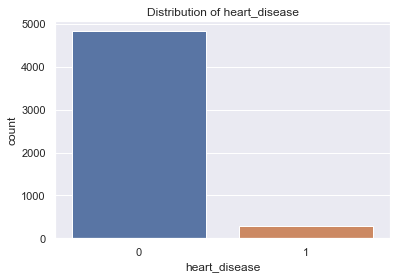

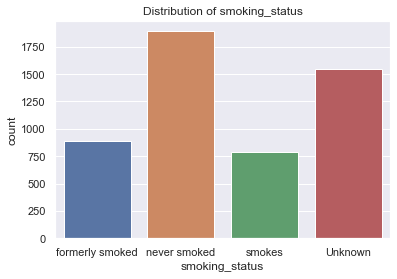

In [182]:

# calling the count plot function with required argument(s) i.e. variables
plot_columns(['gender', 'stroke', 'Residence_type', 'work_type', 'hypertension', 'heart_disease', 'smoking_status'])

#### Bi-variate Analysis


Ploting the target variable grouped by gender


<AxesSubplot:xlabel='gender', ylabel='count'>

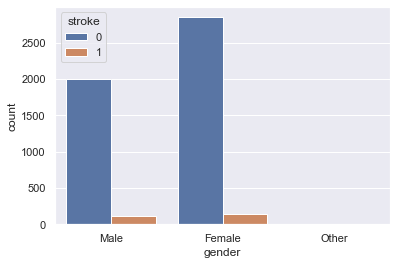

In [183]:
#Bi-variate EDA with target variable and gender
sns.countplot(x="gender", hue="stroke", data=dataframe)

The function below is use to check the distribution of a binary target variable in a dataset by gender. the function also check and confirm if the dataset is balance or not 

In [184]:
def check_target_distribution_by_gender(data, target, gender_col='gender'):
    """
    Function to check the distribution of a binary target variable in a dataset by gender.

    Parameters:
    - data (pandas.DataFrame): Dataset to be analyzed.
    - target (str): Name of the binary target variable.
    - gender_col (str): Name of the column that contains gender information.

    Returns:
    - % of the gender in the traget variable
    - count of the responses in the target varaible
    - % of each response of the target varaible 
    - A statement to confirm if the data is balance or not
    """

    # Calculate the percentage of samples with the target variable for each gender
    female_with_target = data[data[gender_col] == 'Female'][target].sum() / data[data[gender_col] == 'Female'][target].count() * 100
    male_with_target = data[data[gender_col] == 'Male'][target].sum() / data[data[gender_col] == 'Male'][target].count() * 100
    other_gender_with_target = data[data[gender_col] == 'Other'][target].sum() / data[data[gender_col] == 'Other'][target].count() * 100

    print("% of Female with {}: {:2.2f}%".format(target, female_with_target))
    print("% of Male with {}: {:2.2f}%".format(target, male_with_target))
    print("% of Other gender with {}: {:2.2f}%".format(target, other_gender_with_target))
    print('*' * 30)

    # Check the distribution of the target variable for the whole dataset
    target_counts = data[target].value_counts()
    print(target_counts)
    print('*' * 30)

    # Calculate the percentage of samples in each class
    percentage_target = target_counts[1] / len(data) * 100
    percentage_no_target = target_counts[0] / len(data) * 100
    print('Percentage of {} cases: {:.2f}%'.format(target, percentage_target))
    print('Percentage of non-{} cases: {:.2f}%'.format(target, percentage_no_target))
    print('*' * 30)

    if percentage_target == percentage_no_target:
        print('The dataset is balanced. Oversampling or undersampling may not be required.')
    else:
        print('The dataset is imbalanced. Oversampling or undersampling may be required.')

        

        
# calling the function with required argument(s)
check_target_distribution_by_gender(dataframe, 'stroke')

% of Female with stroke: 4.71%
% of Male with stroke: 5.11%
% of Other gender with stroke: 0.00%
******************************
0    4861
1     249
Name: stroke, dtype: int64
******************************
Percentage of stroke cases: 4.87%
Percentage of non-stroke cases: 95.13%
******************************
The dataset is imbalanced. Oversampling or undersampling may be required.


Function to perform EDA on numerical variables to explore the range, distribution and outliers of numeric variables in a dataset 




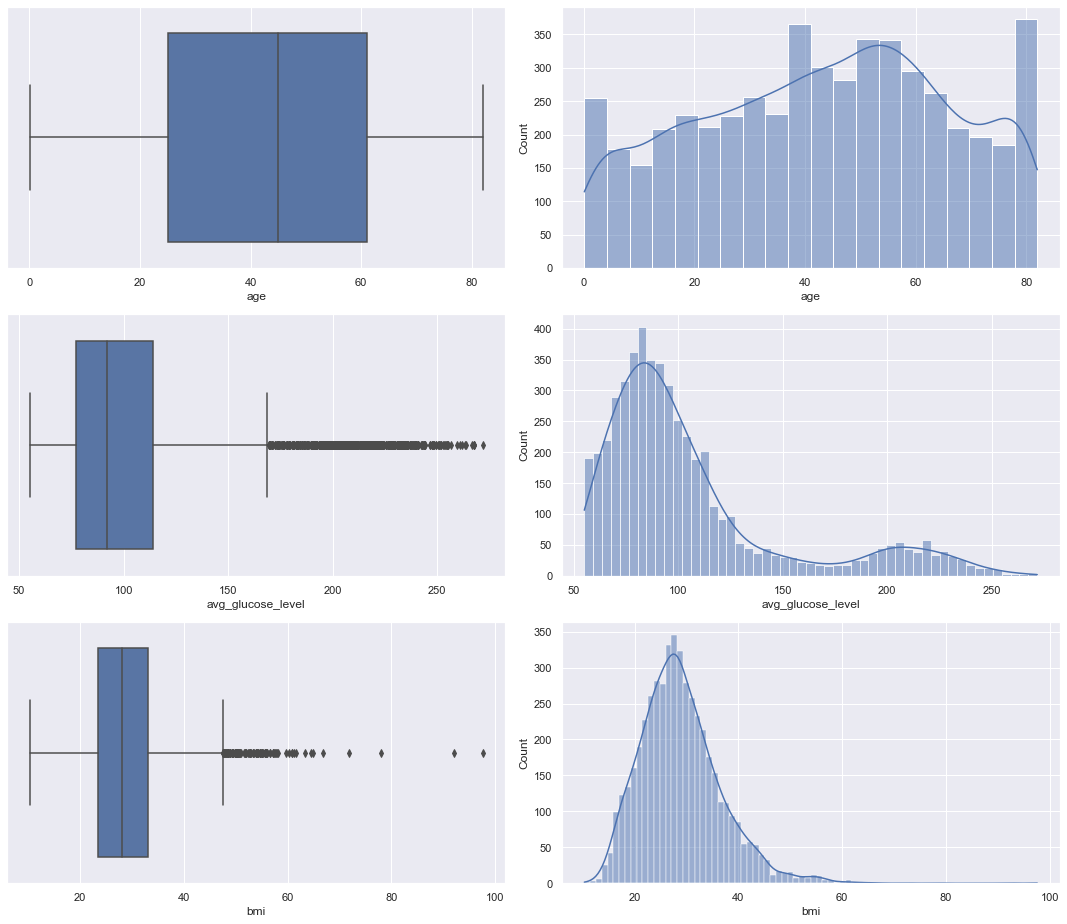

In [185]:
#function to plot numeric variables 

def plot_numeric_data(df, x_vars, figsize=(15, 13)):
    """
    Function plot box plot and histogram for the numeric variables.

    Parameters:
    - data (pandas.DataFrame): Dataset to be analyzed.
    
    - x_vars (list): list of numeric varibales.
    
    Returns:
    - A box plot and histogram for each variables passed
    
    """
    fig, ax = plt.subplots(len(x_vars), 2, figsize=figsize)
    for i, var in enumerate(x_vars):
        sns.boxplot(x=df[var], ax=ax[i, 0])
        sns.histplot(df[var], kde=True, ax=ax[i, 1])
    plt.tight_layout()

    
# calling the function with required argument(s) 
plot_numeric_data(dataframe, ['age', 'avg_glucose_level', 'bmi'])


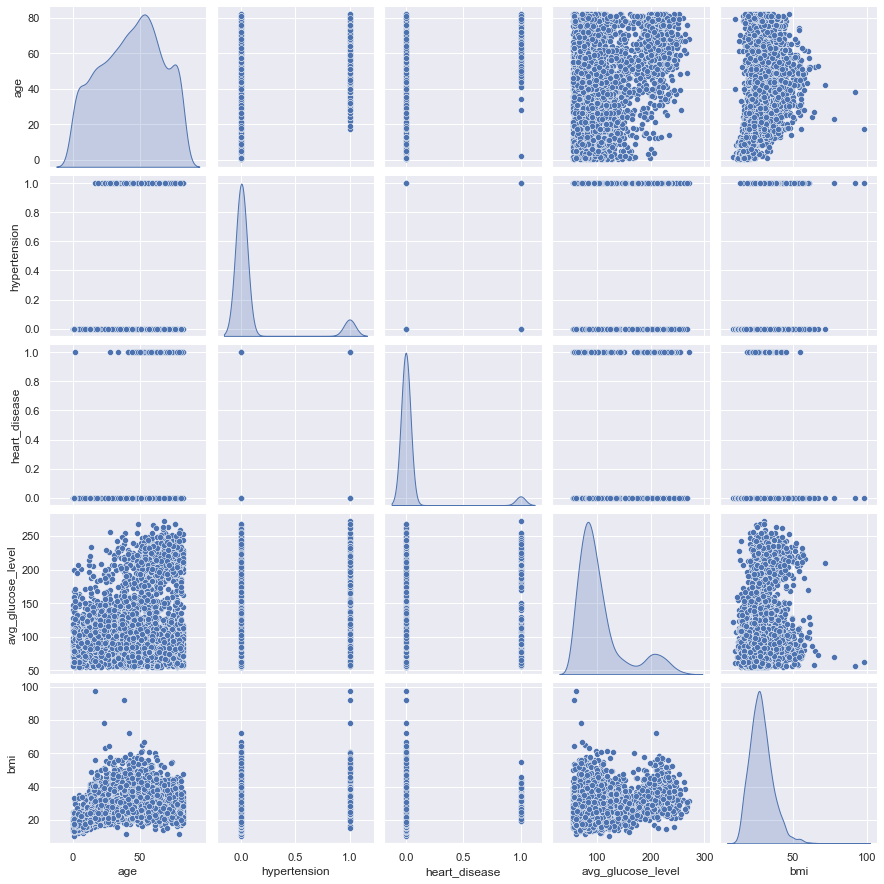

In [186]:
#function to plot pairplot numeric variables 
def create_pairplot(data):
    """
    Function to plot pairplot for all variables

    Parameters:
    - data (pandas.DataFrame): Dataset to be analyzed.
    
    Returns:
    - A pairplot that shows pairwise relationships between variables in the dataset
    
    """
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    df_attr = data.iloc[:, 1:-1] # Select all columns except the id and target (the first and last)variable
    sns.pairplot(df_attr, diag_kind='kde')

    
# calling the function with required argument(s) 
create_pairplot(dataframe)

The create_heatmap function below is created to simplify the visualization of the correlation between variables in a given dataset. The function takes a pandas DataFrame as input and uses the corr method to compute the pairwise correlation between all numeric columns in the DataFrame, except for the first column which is assumed to be the target variable.

Overall, the create_heatmap function is a simple and effective way to gain insight into the relationships between variables in a dataset and identify potentially important features for further analysis or modeling. The function can be called multiple times the module to limit code repeatition.

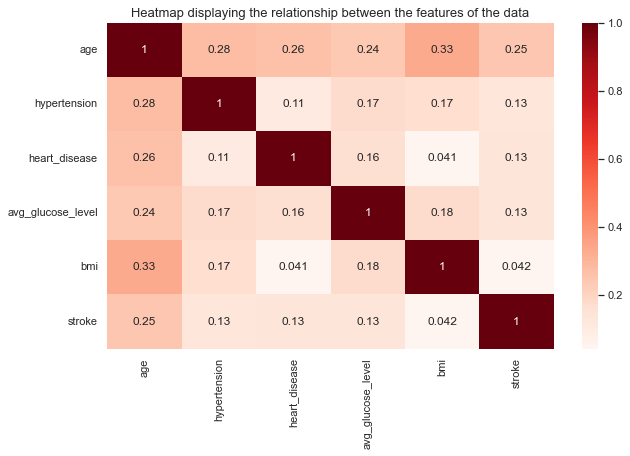

In [187]:
# heatmap function
def create_heatmap(data):
    """
    Function to heatmap between the variables in the dataset

    Parameters:
    - data (pandas.DataFrame): Dataset to be analyzed.
    
    Returns:
    - Plot a Heatmap of relationships between variables in the dataset
    
    """
    plt.figure(figsize=(10,6))
    sns.heatmap(data.iloc[:, 1:].corr(), cmap=plt.cm.Reds, annot=True)
    plt.title('Heatmap displaying the relationship between the features of the data', fontsize=13)
    plt.show()
    

# calling the function with required argument(s) 
# the heatmap with show resul for numerical variables as the the cat. variables are yet to be converted
create_heatmap(dataframe)

#### Data Cleaning 
The data cleaning process ensure that theres no duplicate, missing values or noise of any form in the dataset to avoid bias in our model

In [188]:
#creating a copy of the dataframe
df_stroke = dataframe.copy()

In [189]:
#removing the null value from the bmi column
df_stroke = df_stroke.dropna(subset=['bmi'])

In [190]:
# Remove column name 'id'
df_stroke = df_stroke.drop(['id'], axis=1)

In [191]:
# checking the number of null value in each features/column
df_stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Feature engineering 

The categorical variable was encoded into integer using the LabelEncoder module from sklearn


In [192]:
#encoding the categorical variabel into integer
varList = df_stroke.select_dtypes(include = "object").columns

le = LabelEncoder()

for i in varList:
    df_stroke[i] = le.fit_transform(df_stroke[i].astype(str))

In [193]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int32  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int32  
 5   work_type          4909 non-null   int32  
 6   Residence_type     4909 non-null   int32  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int32  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 364.3 KB


In [194]:
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


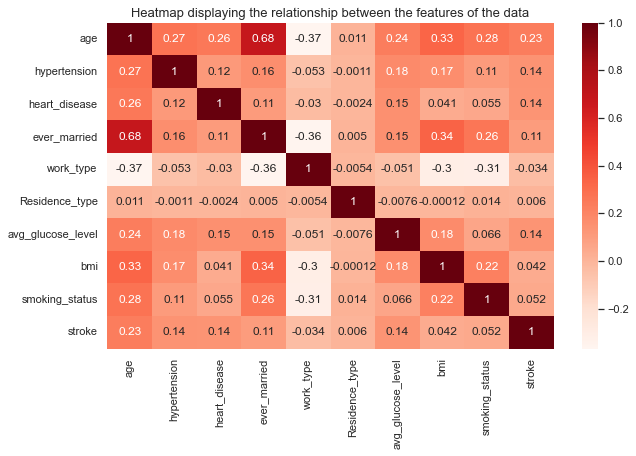

In [195]:
# calling the heatmap function with required argument(s) to display corrolation for all variables
create_heatmap(df_stroke)

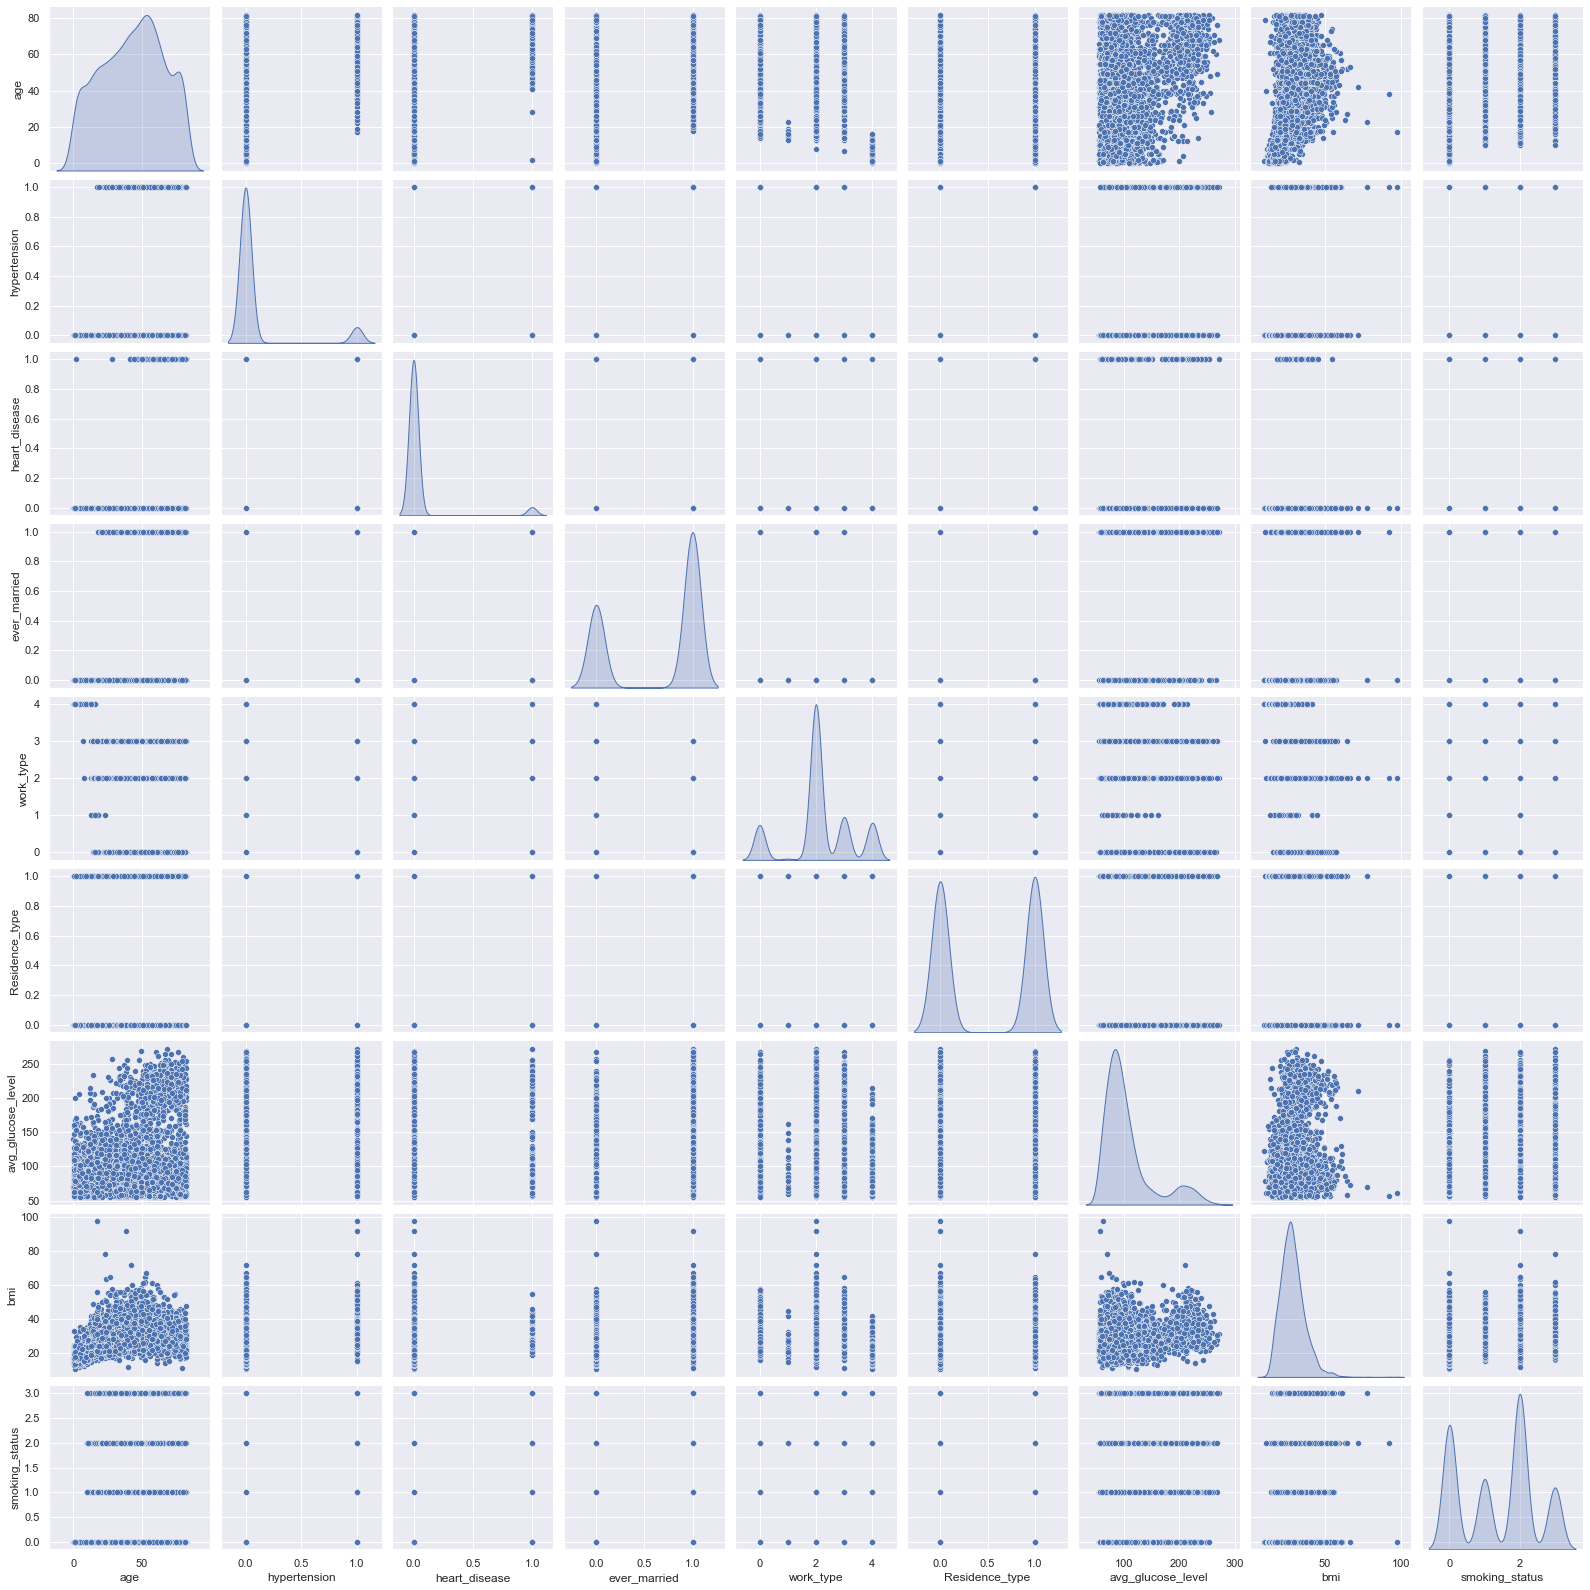

In [196]:
# calling the pairplot function with required argument(s)
create_pairplot(df_stroke)

#### Modeling Selection and Training

The ML models selected for this study are Logistic Regression, Random Forest, and SVM. 

The dataset were scaled and  SMOTE was employed to handle the oversampling issue, thereafter, the selected models will be trained using the preprocessed data to learn from the patterns in the data.

In [197]:
# Split the data into input features and target variable
X = df_stroke.drop(['stroke'], axis=1)
y = df_stroke['stroke']

# Split the data into training and testing sets 80:20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the predictor using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [198]:
# Print class distribution of original and resampled data
print('Class distribution before resampling:', y_train.value_counts())
print("*" * 60)
print('Class distribution after resampling:', y_train_resampled.value_counts())

Class distribution before resampling: 0    3771
1     156
Name: stroke, dtype: int64
************************************************************
Class distribution after resampling: 0    3771
1    3771
Name: stroke, dtype: int64




#### Model Training and Evaluation 


We created the below model_evaluator utility function to train any ML model, evaluate its performance on test data, and display the evaluation metrics along with a confusion matrix plot. The function takes a scikit-learn model object, training feature data, training target data, test feature data, and test target data as input.

The function is a useful utility function that simplifies the process of evaluating a machine learning model's performance and visualizing the results. It can be used as a building block for developing more complex evaluation pipelines for machine learning models.


In [199]:
def model_evaluator(model, X_train, y_train, X_test, y_test):
    """
    Train a model, test it on test data, and print evaluation metrics.
    Also plot a confusion matrix.
    
    Parameters:
    - model : a scikit-learn model object
    - X_train : training feature data
    - y_train : training target data
    - X_test : test feature data
    - y_test : test target data
    
    Returns:
    - None
    """
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Test the model on the test data
    y_pred = model.predict(X_test)
    
    # Compute evaluation metrics accuracy, sensitivity and specificity
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    model_accuracy = (TP+TN)/(TP+TN+FP+FN)
    model_recall = TP/(TP+FN)
    model_specificity = TN/(TN+FP)
    
    df = pd.DataFrame({'Accuracy': [model_accuracy], 'Sensitivity/Recall': [model_recall], 'Specificity': [model_specificity]})
    display(df.style.hide(axis='index'))
    
    
	# Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues_r', fmt='g')
    plt.title('Confusion matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Random Forest Base Model Metrics and Confusion Matrix


Accuracy,Sensitivity/Recall,Specificity
0.921589,0.037736,0.972013


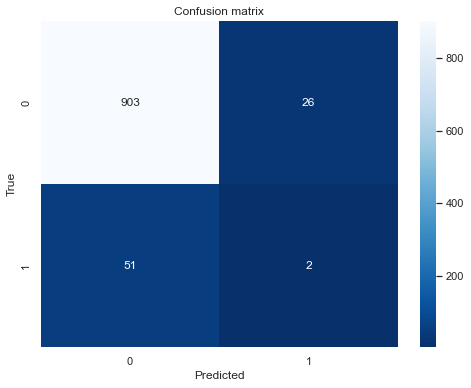

In [200]:
# Create a model object for Random Forest Classifier
rfc_model = RandomForestClassifier(random_state=42)

print("Random Forest Base Model Metrics and Confusion Matrix")
# Train and test the model
model_evaluator(rfc_model, X_train_resampled, y_train_resampled, X_test_scaled, y_test)

Logistic Regression Base Model Metrics and Confusion Matrix


Accuracy,Sensitivity/Recall,Specificity
0.750509,0.811321,0.747040


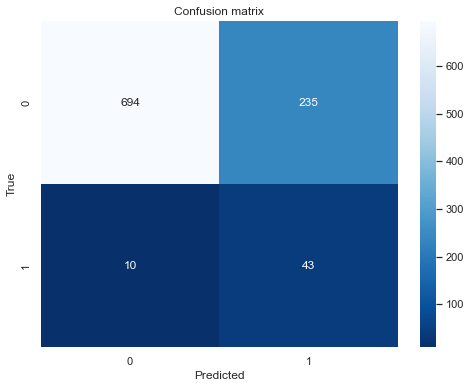

In [201]:
# Create a model object for Logistic regression
lr_model = LogisticRegression()

print("Logistic Regression Base Model Metrics and Confusion Matrix")
# Train and test the model
model_evaluator(lr_model, X_train_resampled, y_train_resampled, X_test_scaled, y_test)

Support Vector Classifier Base Model Metrics and Confusion Matrix


Accuracy,Sensitivity/Recall,Specificity
0.782077,0.490566,0.798708


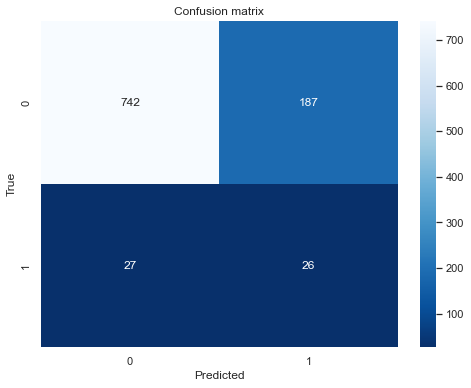

In [202]:
# Create a model object for Support Vector Classifier
svc_model = SVC(random_state=42)


print("Support Vector Classifier Base Model Metrics and Confusion Matrix")
# Train and test the model
model_evaluator(svc_model, X_train_resampled, y_train_resampled, X_test_scaled, y_test)

#### Hyperparameter Tuning 

After evaluating the performance of the models, we tune the hyperparameters of the best performing model to optimize its performance. This involves using Random search to find and adjusting the models parameters to achieve the best possible results.


In [145]:
# Define the hyperparameter grid to be use in tuning RFC
param_dist = {'bootstrap': [True, False],
              'n_estimators': randint(10, 1000),
              'max_depth': randint(1, 100),
              'min_samples_split': randint(2, 50),
              'min_samples_leaf': randint(1, 50),
              'max_features': ['auto', 'sqrt', 'log2', None]}


# Define the RFC Random Search model with 5-fold cross-validation
random_search = RandomizedSearchCV(RandomForestClassifier(), 
                                   param_distributions=param_dist,
                                   n_iter=100, 
                                   cv=5, 
                                   n_jobs=-1,
                                   verbose=3,
                                   random_state=42)

# Fit the random search object to the data
random_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000265AA6BEDF0>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000265A89DD820>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000265AA7B70D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000265A8B30A90>},
                   random_state=42, verbose=3)

In [149]:
#Print the best RFC parameters
random_search.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 313}

In [203]:
#passing the best parameter values to the RFC model
rfc = RandomForestClassifier(bootstrap=False,
                             n_estimators=313,
                             min_samples_leaf=2,
                             min_samples_split=2,
                             max_features='auto',
                             max_depth=60)

Random Forest Tunned Model Metrics and Confusion Matrix


Accuracy,Sensitivity/Recall,Specificity
0.924644,0.037736,0.975242


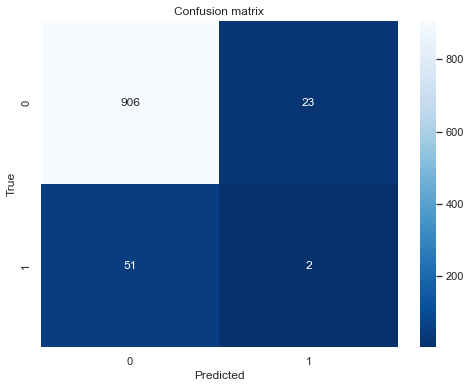

In [204]:
print("Random Forest Tunned Model Metrics and Confusion Matrix")

#calling the model_evaluater with the tunned RFC
model_evaluator(rfc, X_train_resampled, y_train_resampled, X_test_scaled, y_test)

In [138]:
# Define the hyperparameter grid to be use in tuning LR
grid = dict()
grid['penalty'] = ['l1', 'l2', 'elasticnet', 'none']
grid['C'] = loguniform(1e-5, 100)
grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
grid['max_iter'] = [100, 1000, 10000]

# Define the LR Random Search model with 5-fold cross-validation
lr_search = RandomizedSearchCV(LogisticRegression(), 
                            grid, 
                            n_iter=100, 
                            error_score=0, 
                            verbose=3,
                            n_jobs=-1,
                            cv=5,
                            random_state=42)

# Fit the random search object to the data
lr_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\fatai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
215 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fatai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fatai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\fatai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 457, in _check_solver
    raise ValueError(
Valu

RandomizedSearchCV(cv=5, error_score=0, estimator=LogisticRegression(),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000265AA398E20>,
                                        'max_iter': [100, 1000, 10000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, verbose=3)

In [151]:
#getting the best parameter for LR
lr_search.best_params_

{'C': 0.0015866892068163172,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'saga'}

In [206]:
#setting up an instance of LR witht the best parameter
lr = LogisticRegression(penalty='l1',
                        solver='saga',
                        C=0.0015866892068163172,
                        max_iter=10000,
                        random_state=42)

Logistic Regression Tunned Model Metrics and Confusion Matrix


Accuracy,Sensitivity/Recall,Specificity
0.720978,0.811321,0.715823


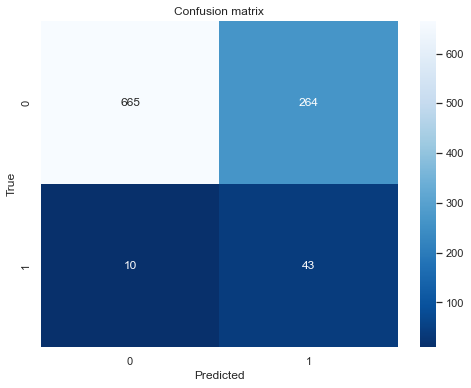

In [207]:
print("Logistic Regression Tunned Model Metrics and Confusion Matrix")

#calling the model_evaluater with the tunned RFC
model_evaluator(lr, X_train_resampled, y_train_resampled, X_test_scaled, y_test)

In [110]:
# Define the parameter grid for Random Search on SVC
param_distributions = {'C': uniform(loc=0, scale=10),
                       'gamma': ['scale', 'auto'],
                       'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                       'degree': [2, 3, 4],
                       'coef0': uniform(loc=0, scale=5)}

# Define the SVC Random Search model with 5-fold cross-validation
random_search_svc = RandomizedSearchCV(estimator=SVC(), 
                                       param_distributions=param_distributions, 
                                       n_iter=100, 
                                       cv=5, 
                                       n_jobs=-1,
                                       verbose=3,
                                       random_state=42)


# Fit the random search object to the data
random_search_svc.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021D8E186D90>,
                                        'coef0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021D85E03DF0>,
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, verbose=3)

In [111]:
#Getting the best SVC parameters
random_search_svc.best_params_

{'C': 6.350936508676438,
 'coef0': 0.2265200488602226,
 'degree': 4,
 'gamma': 'auto',
 'kernel': 'poly'}

Support Vector Machine Tunned Model Metrics and Confusion Matrix


Accuracy,Sensitivity/Recall,Specificity
0.831976,0.339623,0.860065


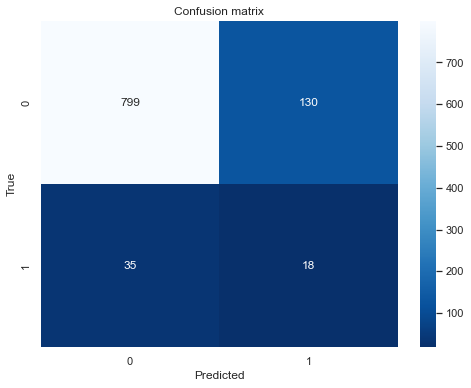

In [208]:
#define the best random search parameter to SVC model
svc = SVC(C=6.350936508676438,
    	coef0=0.2265200488602226,
          degree=4,
          gamma='auto',
          kernel='poly')




print("Support Vector Machine Tunned Model Metrics and Confusion Matrix")
#calling the model_evaluater with the tunned RFC
model_evaluator(svc, X_train_resampled, y_train_resampled, X_test_scaled, y_test)

Based on the analysis done so far, it is evident that the three models, including Random Forest, Support Vector Machine, and Logistic Regression, are all effective in predicting the likelihood of stroke based on demographic and health-related factors.

However, in terms of sensitivity and specificity, the Logistic Regression model appears to be the better option, achieving a decent score accross the choosing metrics. The LR base model achieve a score of 75%, 81%, and 75% for accuracy, sensitivity, specificity score.

Therefore, we believe that Logistic Regression is the best model for predicting stroke, given its high accuracy, sensitivity, and specificity.